___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [8]:
pdata = pd.read_csv("KNN_Project_Data")

**Check the head of the dataframe.**

In [9]:
pdata.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

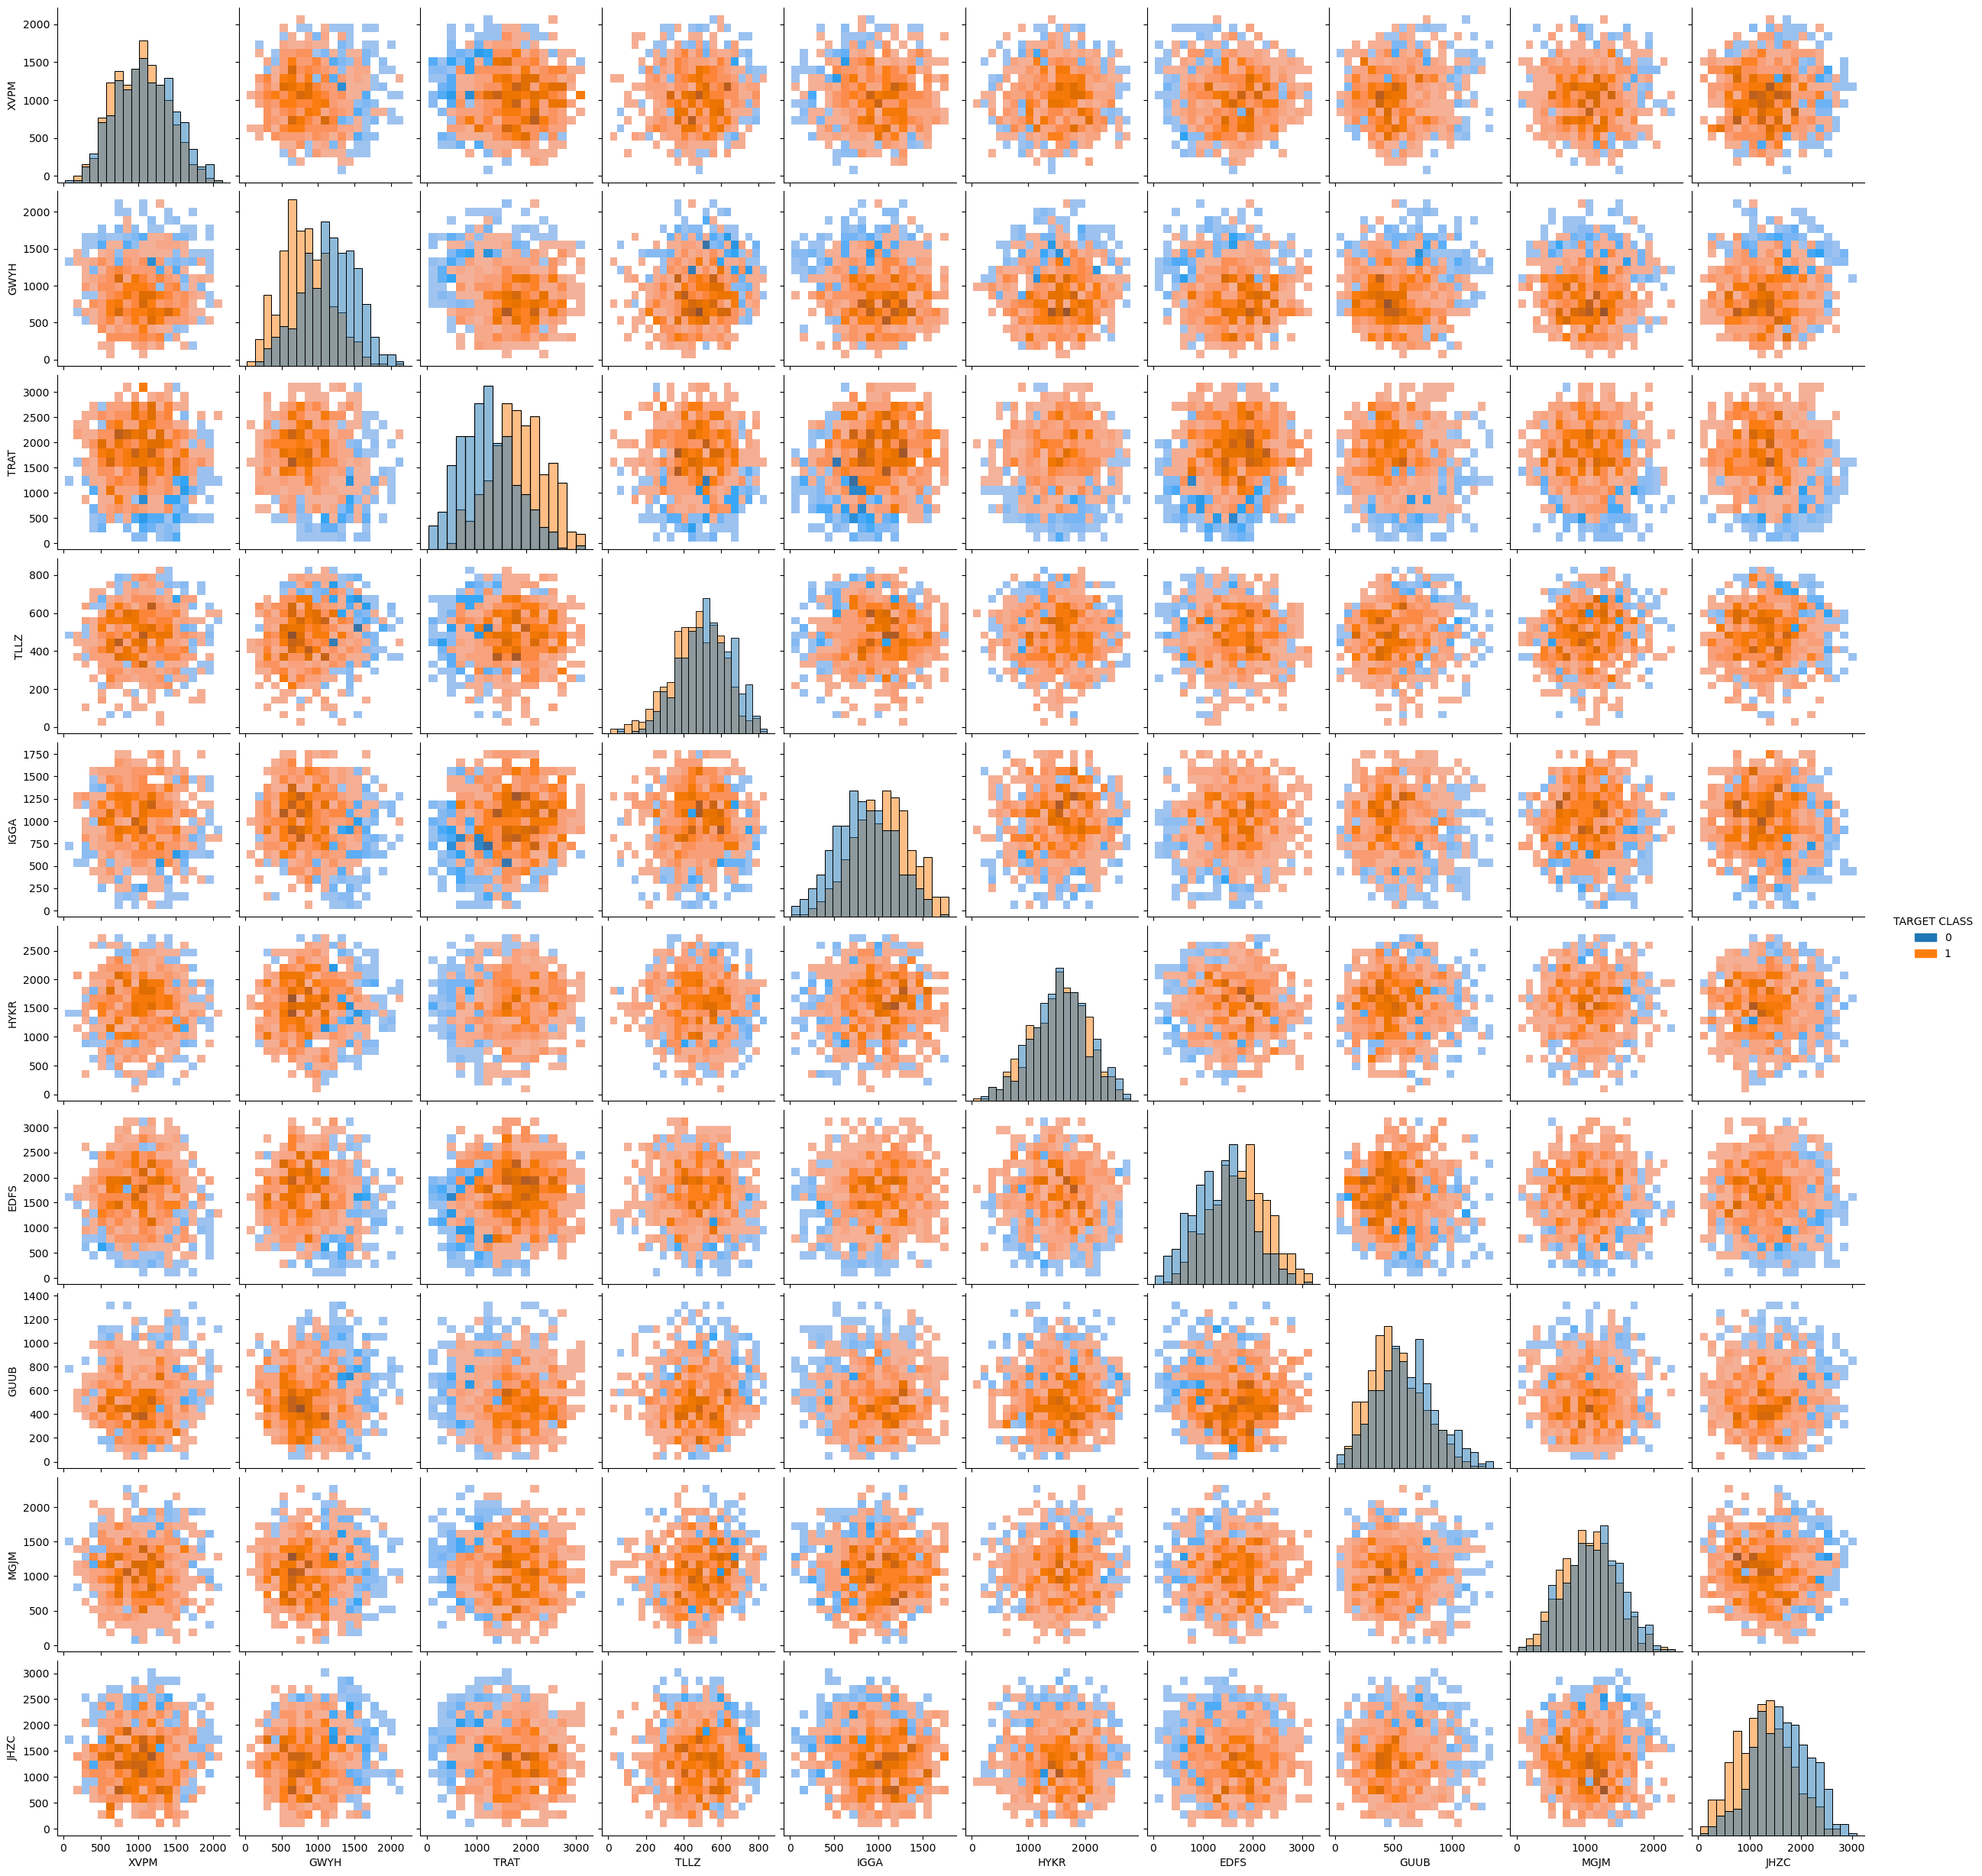

In [10]:

sns.pairplot(pdata,hue="TARGET CLASS",kind="hist")

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [11]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [12]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [13]:
scaler.fit(pdata.drop("TARGET CLASS",axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [14]:
scaled_features = scaler.transform(pdata.drop("TARGET CLASS",axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [20]:
df_feat = pd.DataFrame(scaled_features,columns=pdata.columns[:-1])

In [21]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df_feat
y = pdata['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [29]:
knn = KNeighborsClassifier(n_neighbors = 1)

**Fit this KNN model to the training data.**

In [30]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [31]:
predict = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [34]:
print(confusion_matrix(y_test,predict))

[[109  43]
 [ 41 107]]


# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [35]:
error_rate=[]

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    predict_i = knn.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

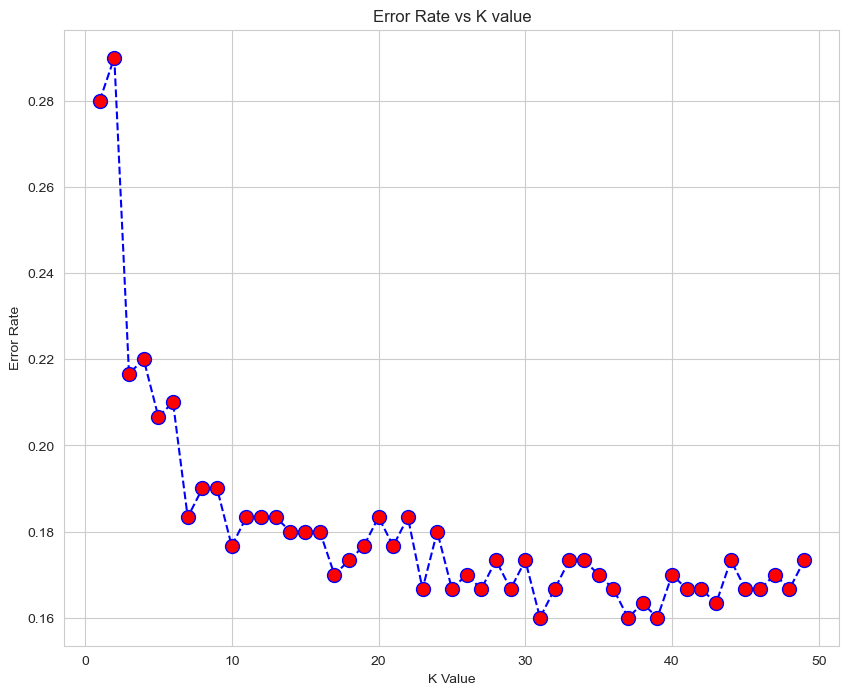

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.plot(range(1,50),error_rate,color='blue',ls='--',marker="o",markerfacecolor='red',markersize=10)
plt.title("Error Rate vs K value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

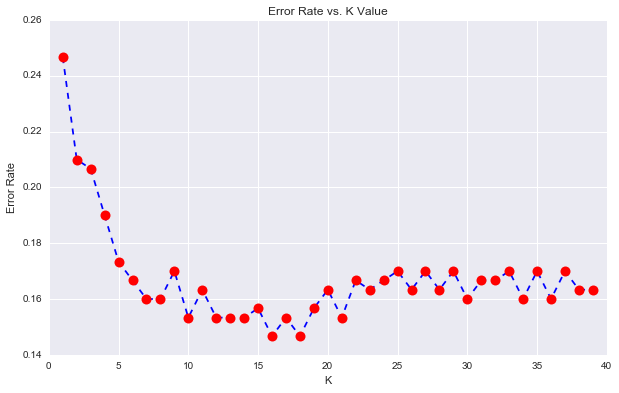

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [50]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
predict_2 = knn.predict(X_test)
print("New Confusion Matrix : ", confusion_matrix(y_test,predict_2))
print("\n")
print("Classification Report : ", "\n", classification_report(y_test,predict_2))


New Confusion Matrix :  [[123  29]
 [ 19 129]]


Classification Report :  
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



# Great Job!